In [4]:
import requests
from bs4 import BeautifulSoup
import re

# 定義要爬取的頁數（最新十頁）
num_pages = 10
base_url = 'https://www.ptt.cc'
board_name = 'Japan_Travel'

data = {
    '標題': [],
    '作者': [],
    '日期': [],
    '內容': []
}

# 關鍵字正則表達式，這裡確保標題包含"沖繩"
keyword_pattern = re.compile(r'沖繩|OKINAWA|琉球', re.IGNORECASE)

# 取得最新頁數
url = f'{base_url}/bbs/{board_name}/index.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
pagination = soup.find_all('a', class_='btn wide')
if pagination:
    last_page_url = pagination[-2].get('href')
    last_page = int(re.search(r'\d+', last_page_url).group())

# 開始爬取最後十頁
for page in range(last_page, last_page - num_pages, -1):
    url = f'{base_url}/bbs/{board_name}/index{page}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    articles = soup.find_all('div', class_='r-ent')
    for article in articles:
        title = article.find('div', class_='title')
        if title is not None and title.a:
            link = title.a.get('href')
            article_url = f'{base_url}{link}'
            article_response = requests.get(article_url)
            article_soup = BeautifulSoup(article_response.text, 'html.parser')

            article_title = title.text.strip()
            author = article.find('div', class_='author').text.strip()
            date = article.find('div', class_='date').text.strip()

            # 檢查文章內容是否存在，避免出現'NoneType'錯誤
            content_element = article_soup.find('div', class_='bbs-screen bbs-content')
            if content_element:
                content = content_element.text.strip()
            else:
                content = "無內容"

            if keyword_pattern.search(article_title):
                data['標題'].append(article_title)
                data['作者'].append(author)
                data['日期'].append(date)
                data['內容'].append(content)

# 列印結果
for i in range(len(data['標題'])):
    print(f'標題: {data["標題"][i]}')
    print(f'作者: {data["作者"][i]}')
    print(f'日期: {data["日期"][i]}')
    print(f'內容: {data["內容"][i]}')
    print('-----------------------------------------')

標題: [問題] 沖繩五天四夜自由行 行程&自駕請益
作者: vuvuvuyu
日期: 11/05
內容: 作者vuvuvuyu (翔)看板Japan_Travel標題[問題] 沖繩五天四夜自由行 行程&自駕請益時間Sun Nov  5 03:49:49 2023

１． 出遊日期： 共五天四夜。12/26-12/30
疫情後第一次安排的出國行程！！跟朋友兩個人決定到沖繩自由行

２． 每日行程：四天住宿都是在水之都飯店，預計第2、3兩天需要多行程跟移動比較大
的兩天兩人會合租機車，也體驗一下國道騎車，其他都是步行、公車、計程車。

12/26（二）
12:25到那霸機場
單軌電車搭到美榮橋站-到水之都飯店放行李
吃午餐：沖繩麵どらえもん 国際通り店
波上宮+波之上海灘
晚餐：琉家拉麵
晚上閒逛國際通

12/27（三）
早餐：沖繩飯糰
8:30取機車
玉泉洞
（備用：知念岬公園、齋場御嶽）
首里城公園
午餐：富久屋
（備用：港川外人住宅）
到美國村（+Aeon寶可夢中心沖繩店）
北谷日落海灘看夕陽
晚餐迴轉壽司市場 美濱店
晚上逛美國村or回國際通or飯店酒吧泳池

12/28（四）
早餐：C&C Breakfast
9:00萬座毛
10:00前往古宇利島
11:00午餐：古宇利蝦蝦飯
12:00古宇利海洋塔
13:30美麗海水族館
（有時間的話去今歸仁城）
18:00晚餐：百年古家 大家 阿古豬
回國際通還車

12/29（五）
9:00-12:00賞鯨
午餐JBF
瀨長島閒逛（幸福鬆餅）
泡溫泉
看夕陽
晚餐魚屋直営地魚食堂 魚まる
晚上逛國際通

12/30（六）
早餐：飯店
買伴手禮
牧志市場（含午餐）
沖宮
14:00到那霸機場
16:30那霸機場起飛

３． 特別希望：我們兩個都很愛寶可夢，所以兩個寶可夢購物旅程必去！

第一天想說下午才到，景點就只安排波之上，吃的也都排國際通，不用太趕

第二天專心跑行程，東南部其實只有玉泉洞覺得必看，其他景點有查但覺得可去可不去（
主要看會在玉泉洞那區待多久），中午回到首里城這邊，雖然首里城目前在整修，但如果
想了解琉球王國相關歷史跟看城池好像這裡還是必來，或者大家有更推可以了解琉球歷史
跟其他城池更好的也請推薦～

下午安排美國村行程，看日落沙灘看夕陽，晚餐吃迴轉壽司
晚餐看美國村還想不想逛，逛完再騎回國際通



Part2 文字雲

In [16]:
data = str(data) #將文字資料轉成string形式
cleaned_data = re.findall('沖繩|牧志|那霸|玉泉洞|国際通|國際通|水族館|古宇利島|首里城|瀨長島|知念岬公園|啤酒工廠|石垣島|殘波岬|真榮田岬|波上宮神社|美國村', data)
cleaned_data


['沖繩',
 '沖繩',
 '沖繩',
 '那霸',
 '沖繩',
 '国際通',
 '國際通',
 '沖繩',
 '玉泉洞',
 '知念岬公園',
 '首里城',
 '美國村',
 '沖繩',
 '美國村',
 '國際通',
 '古宇利島',
 '水族館',
 '國際通',
 '瀨長島',
 '國際通',
 '牧志',
 '那霸',
 '那霸',
 '國際通',
 '玉泉洞',
 '玉泉洞',
 '首里城',
 '首里城',
 '美國村',
 '美國村',
 '國際通',
 '水族館',
 '水族館',
 '國際通',
 '瀨長島',
 '國際通',
 '國際通',
 '牧志',
 '那霸',
 '水族館',
 '那霸',
 '那霸',
 '沖繩',
 '那霸',
 '那霸',
 '水族館',
 '水族館',
 '水族館',
 '國際通',
 '沖繩',
 '玉泉洞',
 '玉泉洞',
 '那霸',
 '古宇利島',
 '水族館']

In [17]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
word_freq = Counter(cleaned_data)
print(word_freq)

Counter({'國際通': 10, '那霸': 9, '沖繩': 8, '水族館': 8, '玉泉洞': 5, '美國村': 4, '首里城': 3, '古宇利島': 2, '瀨長島': 2, '牧志': 2, '国際通': 1, '知念岬公園': 1})


In [14]:
!apt-get -qq install -y fonts-noto-cjk

In [19]:
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
wordcloud = wc.generate_from_frequencies(word_freq)

(-0.5, 799.5, 599.5, -0.5)

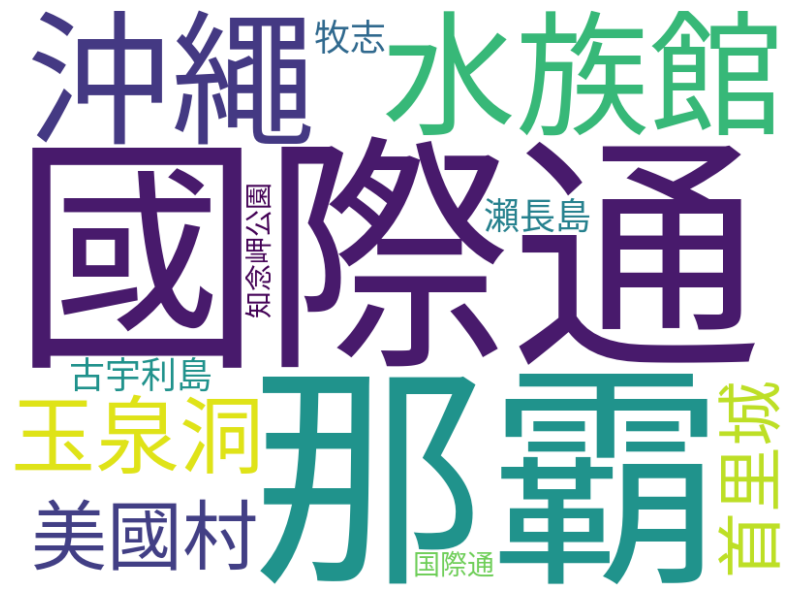

In [20]:
# 顯示文字雲
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')